In [1]:
import numpy as nm    

import matplotlib.pyplot as mtp    

import pandas as pd    

# Importing the dataset  

df = pd.read_csv('route.csv')  

df

,FROM_BRANCH,LORRY_ROUTE_FROM,FROM_LAT,FROM_LONG,TO_BRANCH,LORRY_ROUTE_TO,TO_LAT,TO_LONG,COUNT(*)
0,DADRI-UTTAR PRADESH,1352,28.543270,77.563139,DADRI-UTTAR PRADESH,2202,27.217000,77.945500,3
1,MUMBAI HUB-MAHARASTRA,2117,19.292435,73.108218,MUMBAI HUB-MAHARASTRA,505,12.725908,77.794993,17
2,BINOLA HUB-HARYANA,1328,28.310665,76.878154,BINOLA HUB-HARYANA,3001,11.601700,78.092100,218
3,GGN HERO HONDA-HARYANA,1327,28.396200,76.993000,GGN HERO HONDA-HARYANA,1904,30.369900,76.474500,2
4,AHMEDABAD-GUJARAT,301,22.858414,72.379637,AHMEDABAD-GUJARAT,504,13.243170,77.230417,17
...,...,...,...,...,...,...,...,...,...
6626,SALEM-TAMILNADU,3001,11.601700,78.092100,SALEM-TAMILNADU,3005,10.789800,76.720800,1
6627,SHOLAVARAM CHENNAI,1003,13.231600,80.163300,SHOLAVARAM CHENNAI,2502,21.257048,81.555200,1
6628,PATANCHERU-TELANGANA,1608,17.525300,78.271700,PATANCHERU-TELANGANA,2216,27.923300,78.125600,1
6629,SHAMLI,2217,29.422819,77.259851,SHAMLI,2212,29.444438,77.697286,2


In [2]:
df.head()

,FROM_BRANCH,LORRY_ROUTE_FROM,FROM_LAT,FROM_LONG,TO_BRANCH,LORRY_ROUTE_TO,TO_LAT,TO_LONG,COUNT(*)
0,DADRI-UTTAR PRADESH,1352,28.543270,77.563139,DADRI-UTTAR PRADESH,2202,27.217000,77.945500,3
1,MUMBAI HUB-MAHARASTRA,2117,19.292435,73.108218,MUMBAI HUB-MAHARASTRA,505,12.725908,77.794993,17
2,BINOLA HUB-HARYANA,1328,28.310665,76.878154,BINOLA HUB-HARYANA,3001,11.601700,78.092100,218
3,GGN HERO HONDA-HARYANA,1327,28.396200,76.993000,GGN HERO HONDA-HARYANA,1904,30.369900,76.474500,2
4,AHMEDABAD-GUJARAT,301,22.858414,72.379637,AHMEDABAD-GUJARAT,504,13.243170,77.230417,17


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6631 entries, 0 to 6630
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FROM_BRANCH       6631 non-null   object 
 1   LORRY_ROUTE_FROM  6631 non-null   int64  
 2   FROM_LAT          6631 non-null   float64
 3   FROM_LONG         6630 non-null   float64
 4   TO_BRANCH         6631 non-null   object 
 5   LORRY_ROUTE_TO    6631 non-null   int64  
 6   TO_LAT            6631 non-null   float64
 7   TO_LONG           6630 non-null   float64
 8   COUNT(*)          6631 non-null   int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 466.4+ KB


In [4]:


df.isnull().sum()



FROM_BRANCH         0
LORRY_ROUTE_FROM    0
FROM_LAT            0
FROM_LONG           1
TO_BRANCH           0
LORRY_ROUTE_TO      0
TO_LAT              0
TO_LONG             1
COUNT(*)            0
dtype: int64

In [5]:


df.fillna(value = 0,inplace = True)


In [6]:

df.isnull().sum()

FROM_BRANCH         0
LORRY_ROUTE_FROM    0
FROM_LAT            0
FROM_LONG           0
TO_BRANCH           0
LORRY_ROUTE_TO      0
TO_LAT              0
TO_LONG             0
COUNT(*)            0
dtype: int64

In [7]:
df.describe()

,LORRY_ROUTE_FROM,FROM_LAT,FROM_LONG,LORRY_ROUTE_TO,TO_LAT,TO_LONG,COUNT(*)
count,6631.000000,6631.000000,6631.000000,6631.000000,6631.000000,6631.000000,6631.000000
mean,1675.036948,23.254714,76.759351,1769.476248,22.833395,77.503491,8.533856
std,1079.739562,6.376602,3.730012,1162.730646,6.113471,5.579326,39.300483
min,102.000000,1.000000,0.000000,102.000000,1.000000,0.000000,1.000000
25%,1005.500000,19.079100,73.959000,1001.000000,18.700402,75.054650,1.000000
50%,1342.000000,22.970300,76.956050,1401.000000,22.858414,77.111500,2.000000
75%,2203.000000,28.487500,77.671367,2502.000000,28.450996,78.720949,5.000000
max,8110.000000,255.000000,95.369256,8460.000000,34.104900,95.369256,2527.000000


In [8]:
len(df['TO_BRANCH'].unique())

399

In [9]:
# df.drop(['FROM_BRANCH'], axis=1, inplace=True)

In [10]:
x = df.iloc[:, [2, 6]].values  
x.shape

(6631, 2)

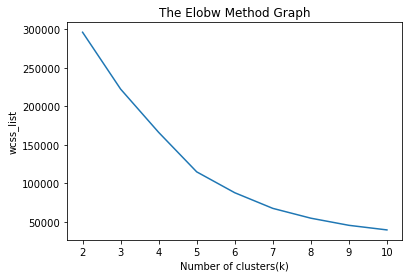

In [11]:
from sklearn.cluster import KMeans  
wcss_list= []
for i in range(2, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  

# print(wcss_list)
mtp.plot(range(2, 11), wcss_list)  
mtp.title('The Elobw Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show() 

In [12]:
from sklearn.cluster import KMeans  
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)  

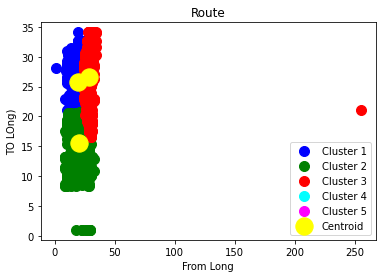

In [13]:
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
mtp.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
mtp.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('Route')  
mtp.xlabel('From Long')  
mtp.ylabel('TO LOng)')  
mtp.legend()  
mtp.show()  

In [23]:
X = df

y = df['FROM_BRANCH']

# X = X.drop(['TO_BRANCH'], axis=1, inplace=True)
X

,FROM_BRANCH,LORRY_ROUTE_FROM,FROM_LAT,FROM_LONG,LORRY_ROUTE_TO,TO_LAT,TO_LONG,COUNT(*)
0,96,1352,28.543270,77.563139,2202,27.217000,77.945500,3
1,237,2117,19.292435,73.108218,505,12.725908,77.794993,17
2,72,1328,28.310665,76.878154,3001,11.601700,78.092100,218
3,128,1327,28.396200,76.993000,1904,30.369900,76.474500,2
4,5,301,22.858414,72.379637,504,13.243170,77.230417,17
...,...,...,...,...,...,...,...,...
6626,326,3001,11.601700,78.092100,3005,10.789800,76.720800,1
6627,342,1003,13.231600,80.163300,2502,21.257048,81.555200,1
6628,281,1608,17.525300,78.271700,2216,27.923300,78.125600,1
6629,338,2217,29.422819,77.259851,2212,29.444438,77.697286,2


In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['FROM_BRANCH'] = le.fit_transform(X['FROM_BRANCH'])

y = le.transform(y)

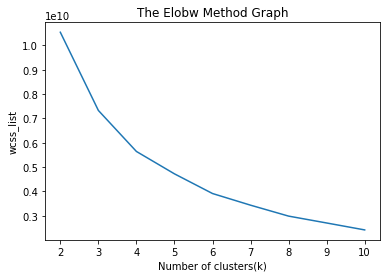

In [25]:
from sklearn.cluster import KMeans  
wcss_list= []
for i in range(2, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(df)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(2, 11), wcss_list)  
mtp.title('The Elobw Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show() 

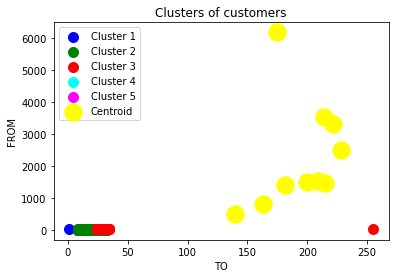

In [26]:
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
mtp.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
mtp.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('Clusters of customers')  
mtp.xlabel('TO')  
mtp.ylabel('FROM')  
mtp.legend()  
mtp.show()  

In [27]:
cols = X.columns

In [28]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

X = pd.DataFrame(X, columns=[cols])

X.head()



,FROM_BRANCH,LORRY_ROUTE_FROM,FROM_LAT,FROM_LONG,LORRY_ROUTE_TO,TO_LAT,TO_LONG,COUNT(*)
0,0.241206,0.156094,0.108438,0.813293,0.251256,0.791937,0.817302,0.000792
1,0.595477,0.251623,0.072017,0.766581,0.048217,0.354205,0.815724,0.006334
2,0.180905,0.153097,0.107522,0.806110,0.346853,0.320246,0.818839,0.085907
3,0.321608,0.152972,0.107859,0.807315,0.215602,0.887177,0.801878,0.000396
4,0.012563,0.024850,0.086057,0.758941,0.048098,0.369830,0.809804,0.006334


In [29]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [30]:


kmeans.cluster_centers_



array([[0.67775848, 0.22438025, 0.09640867, 0.80716445, 0.2045429 ,
        0.80963802, 0.82141698, 0.00304561],
       [0.25130942, 0.18626598, 0.08024993, 0.81013709, 0.23699312,
        0.48407705, 0.80283655, 0.00285203],
       [0.22077062, 0.16055576, 0.09158689, 0.80457116, 0.16595328,
        0.78929944, 0.82034738, 0.00329453],
       [0.765642  , 0.21302631, 0.07942444, 0.79700268, 0.1941385 ,
        0.49811114, 0.80272791, 0.00267465]])

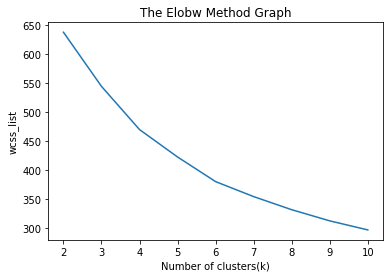

In [31]:
 from sklearn.cluster import KMeans  
wcss_list= []
for i in range(2, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(X)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(2, 11), wcss_list)  
mtp.title('The Elobw Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show() 

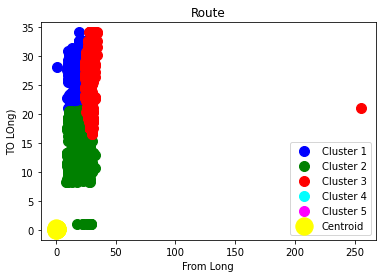

In [32]:
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
mtp.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
mtp.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('Route')  
mtp.xlabel('From Long')  
mtp.ylabel('TO LOng)')  
mtp.legend()  
mtp.show()  